In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import scipy
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
import datetime
import cufflinks as cf
import plotly.offline as plyo
import plotly as ply
import plotly.graph_objs as go
import yfinance as yf

sns.set()
plyo.init_notebook_mode(connected=True)

In [2]:
Daily_return = pd.read_excel('/Users/andy/Desktop/PM/Daily_return.xlsx')
Daily_return = Daily_return.set_index('Date')
Daily_return.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,S&P 500,Russell_1000
Date,,,,,,,,,,,,,,,,
2015-01-02,-0.002092,0.004985,0.006674,-0.009513,0.003848,-0.005897,-0.000478,-0.001582,-0.006527,0.008131,0.000000,-0.000308,-0.001583,-0.000245,-0.000340,-0.000315
2015-01-05,-0.019054,-0.031045,-0.009196,-0.028172,-0.008305,-0.020517,-0.006984,-0.022553,-0.014547,-0.015627,-0.016116,-0.017939,-0.012707,-0.017600,-0.018278,-0.018042
2015-01-06,-0.024679,-0.025929,-0.014677,0.000094,0.010092,-0.022833,-0.004914,-0.010663,-0.001088,-0.001707,-0.008056,-0.012980,-0.003131,-0.009631,-0.008894,-0.008955
2015-01-07,-0.002941,0.001526,0.012705,0.014022,-0.006453,0.010600,0.022076,0.007249,0.013893,0.012996,0.012182,0.006513,0.008796,0.008567,0.011630,0.011650
2015-01-08,0.003484,0.022347,0.029418,0.038422,0.021433,0.006836,0.007863,0.023967,0.016725,0.024983,0.016582,0.018920,0.014897,0.019548,0.017888,0.017695


In [3]:
from scipy import stats

Cols = Daily_return.columns[0:14]
Cols

Index(['GOOGL', 'JPM', 'MSFT', 'AAPL', 'VZ', 'AMZN', 'JNJ', 'MMM', 'BRK-B',
       'BMY', 'Fund', 'Optimal Risky Portfolio', 'Minimum Variance Portfolio',
       'Equally Weight Portfolio'],
      dtype='object')

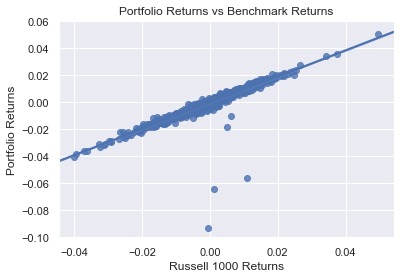

The selected fund's R-square equals to:  0.8072851644737762


In [4]:
def rsquared(x, y):

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

x = Daily_return.loc[:, 'Russell_1000'].values
y = Daily_return.iloc[:, 0:14].values

sns.regplot(x, y[:, 10])

plt.xlabel("Russell 1000 Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()
print("The selected fund's R-square equals to: ", rsquared(x, y[:, 10]))

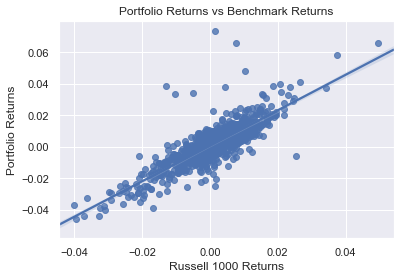

Portfolio's R-square equals to:  0.6870204901133721


In [5]:
sns.regplot(x, y[:, 11])

plt.xlabel("Russell 1000 Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()
print("Portfolio's R-square equals to: ", rsquared(x, y[:, 11]))

In [6]:
AB_5y = pd.DataFrame()
alpha_5y = []
beta_5y = []

for i in range(14):
    b, a, r_value, p_value, std_err = stats.linregress(x, y[:, i])
    # annualize alpha
    alpha_5y.append(round(a * 250, 4))
    beta_5y.append(round(b, 4))
    
AB_5y['alpha_5y'] = alpha_5y
AB_5y['beta_5y'] = beta_5y
AB_5y.index = Cols

AB_5y

,alpha_5y,beta_5y
GOOGL,0.0976,1.1744
JPM,0.0944,1.1717
MSFT,0.1642,1.3077
AAPL,0.1220,1.2342
VZ,0.0616,0.5352
AMZN,0.2688,1.3148
JNJ,0.0409,0.6771
MMM,-0.0349,0.9776
BRK-B,0.0003,0.9780
BMY,-0.0053,0.8302


In [7]:
ret_2017_2019 = Daily_return[(Daily_return.index >= pd.to_datetime('20170101')) & (Daily_return.index <= pd.to_datetime('20191231'))]
ret_2017_2019.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,S&P 500,Russell_1000
Date,,,,,,,,,,,,,,,,
2017-01-03,0.019635,0.010894,0.007081,0.002849,0.022480,0.005068,0.005468,-0.002912,0.005215,0.017283,0.008966,0.009664,0.011719,0.009306,0.008487,0.008416
2017-01-04,-0.000297,0.001844,-0.004474,-0.001119,-0.001099,0.004657,-0.001640,0.001516,0.001526,0.001355,0.006109,0.000865,-0.000117,0.000227,0.005722,0.006900
2017-01-05,0.006499,-0.009205,0.000000,0.005085,0.002201,0.030732,0.010463,-0.003421,-0.004754,0.016740,-0.003312,0.011364,0.003345,0.005434,-0.000771,-0.001134
2017-01-06,0.014993,0.000116,0.008668,0.011148,-0.014835,0.019912,-0.004792,0.002926,0.000674,-0.002993,0.002215,0.007139,-0.001548,0.003582,0.003517,0.003303
2017-01-09,0.002387,0.000697,-0.003183,0.009159,-0.010890,0.001168,-0.000172,-0.005386,-0.008506,-0.003670,-0.003592,-0.001542,-0.004650,-0.001840,-0.003549,-0.003641


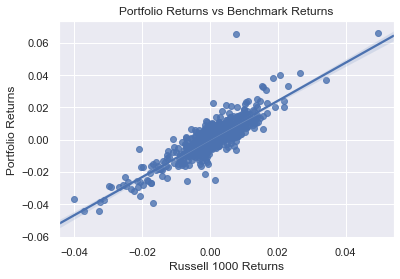

Portfolio's R-square equals to:  0.7556822096058639


In [8]:
sns.regplot(ret_2017_2019['Russell_1000'].values, ret_2017_2019['Optimal Risky Portfolio'].values)

plt.xlabel("Russell 1000 Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()
print("Portfolio's R-square equals to: ", rsquared(ret_2017_2019['Russell_1000'].values, ret_2017_2019['Optimal Risky Portfolio'].values))

In [9]:
x = ret_2017_2019.loc[:, 'Russell_1000'].values
y = ret_2017_2019.iloc[:, 0:14].values

AB_3y = pd.DataFrame()
alpha_3y = []
beta_3y = []

for i in range(14):
    b, a, r_value, p_value, std_err = stats.linregress(x, y[:, i])
    # annualize alpha
    alpha_3y.append(round(a * 250, 4))
    beta_3y.append(round(b, 4))
    
AB_3y['alpha_3y'] = alpha_3y
AB_3y['beta_3y'] = beta_3y
AB_3y.index = Cols

AB_3y

,alpha_3y,beta_3y
GOOGL,0.0312,1.3177
JPM,0.0690,1.0547
MSFT,0.1735,1.3759
AAPL,0.1790,1.3635
VZ,0.0517,0.4307
AMZN,0.1449,1.4915
JNJ,0.0356,0.6540
MMM,-0.0938,1.0902
BRK-B,-0.0068,1.0132
BMY,-0.0105,0.7921


In [10]:
ret_2019 = Daily_return[(Daily_return.index >= pd.to_datetime('20190101')) & (Daily_return.index <= pd.to_datetime('20191231'))]
ret_2019.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,S&P 500,Russell_1000
Date,,,,,,,,,,,,,,,,
2019-01-02,0.009302,0.017312,-0.004430,0.001141,-0.003558,0.024741,-0.010074,0.002152,-0.006759,0.008657,0.002760,0.010359,-0.003287,0.003848,0.001269,0.000701
2019-01-03,-0.027696,-0.014212,-0.036788,-0.099607,0.003570,-0.025242,-0.015890,-0.037654,-0.054931,-0.132641,-0.024465,-0.026205,-0.035267,-0.044109,-0.024757,-0.024083
2019-01-04,0.051294,0.036866,0.046509,0.042689,0.002490,0.050064,0.016783,0.041141,0.018470,0.039229,0.034483,0.037120,0.021582,0.034553,0.034336,0.034375
2019-01-07,-0.001994,0.000695,0.001275,-0.002226,0.006387,0.034353,-0.006415,-0.002300,0.008760,0.032416,0.006364,0.014602,0.004147,0.007095,0.007010,0.007881
2019-01-08,0.008783,-0.001886,0.007251,0.019063,0.029267,0.016612,0.023227,0.004191,-0.003047,-0.008676,0.010238,0.015117,0.011955,0.009478,0.009695,0.010182


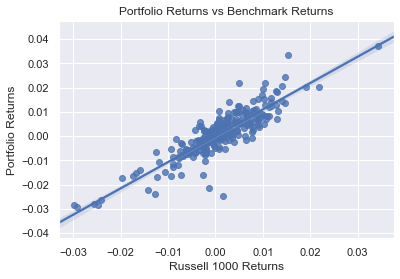

Portfolio's R-square equals to:  0.7743920276123999


In [11]:
sns.regplot(ret_2019['Russell_1000'].values, ret_2019['Optimal Risky Portfolio'].values)

plt.xlabel("Russell 1000 Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()
print("Portfolio's R-square equals to: ", rsquared(ret_2019['Russell_1000'].values, ret_2019['Optimal Risky Portfolio'].values))

In [12]:
x = ret_2019.loc[:, 'Russell_1000'].values
y = ret_2019.iloc[:, 0:14].values

AB_1y = pd.DataFrame()
alpha_1y = []
beta_1y = []

for i in range(14):
    b, a, r_value, p_value, std_err = stats.linregress(x, y[:, i])
    # annualize alpha
    alpha_1y.append(round(a * 250, 4))
    beta_1y.append(round(b, 4))
    
AB_1y['alpha_1y'] = alpha_1y
AB_1y['beta_1y'] = beta_1y
AB_1y.index = Cols

AB_1y

,alpha_1y,beta_1y
GOOGL,-0.0547,1.2657
JPM,0.1306,1.0431
MSFT,0.1393,1.2767
AAPL,0.2641,1.5478
VZ,0.0524,0.3414
AMZN,-0.1079,1.3071
JNJ,0.0263,0.5250
MMM,-0.3187,1.1814
BRK-B,-0.1185,0.8957
BMY,0.0335,0.9348


In [13]:
# Tracking return
TR_5y = []

for asset in Cols:
    tr = Daily_return.loc[:, asset] - Daily_return.iloc[:, -1]
    TR_5y.append(tr)

TR_5y_T = pd.DataFrame(TR_5y)
TR_5y = TR_5y_T.T
TR_5y.columns = Cols
TR_5y.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio
Date,,,,,,,,,,,,,,
2015-01-02,-0.001777,0.005300,0.006988,-0.009198,0.004162,-0.005582,-0.000164,-0.001268,-0.006212,0.008446,0.000315,0.000007,-0.001269,0.000070
2015-01-05,-0.001012,-0.013003,0.008846,-0.010130,0.009737,-0.002475,0.011058,-0.004511,0.003495,0.002414,0.001926,0.000103,0.005335,0.000442
2015-01-06,-0.015724,-0.016974,-0.005722,0.009049,0.019047,-0.013878,0.004041,-0.001708,0.007867,0.007248,0.000899,-0.004025,0.005824,-0.000675
2015-01-07,-0.014591,-0.010124,0.001055,0.002372,-0.018103,-0.001050,0.010426,-0.004401,0.002243,0.001346,0.000532,-0.005137,-0.002854,-0.003083
2015-01-08,-0.014211,0.004651,0.011723,0.020727,0.003738,-0.010859,-0.009833,0.006272,-0.000971,0.007288,-0.001113,0.001224,-0.002799,0.001852


In [14]:
information_ratio_5y = np.sqrt(252) * TR_5y.mean() / TR_5y.std()

INR_5y = pd.DataFrame(information_ratio_5y, columns=['5 year Information ratio'])
INR_5y

,5 year Information ratio
GOOGL,0.644263
JPM,0.796069
MSFT,1.233744
AAPL,0.778287
VZ,0.098777
AMZN,1.274528
JNJ,0.067251
MMM,-0.257526
BRK-B,-0.018807
BMY,-0.095157


In [15]:
TR_3y = []

for asset in Cols:
    tr = ret_2017_2019.loc[:, asset] - ret_2017_2019.iloc[:, -1]
    TR_3y.append(tr)

TR_3y_T = pd.DataFrame(TR_3y)
TR_3y = TR_3y_T.T
TR_3y.columns = Cols

information_ratio_3y = np.sqrt(252) * TR_3y.mean() / TR_3y.std()

INR_3y = pd.DataFrame(information_ratio_3y, columns=['3 year Information ratio'])
INR_3y

,3 year Information ratio
GOOGL,0.448824
JPM,0.562281
MSFT,1.656053
AAPL,1.262154
VZ,-0.116505
AMZN,1.012528
JNJ,-0.056884
MMM,-0.515064
BRK-B,-0.047411
BMY,-0.164373


In [16]:
TR_1y = []

for asset in Cols:
    tr = ret_2019.loc[:, asset] - ret_2019.iloc[:, -1]
    TR_1y.append(tr)

TR_1y_T = pd.DataFrame(TR_1y)
TR_1y = TR_1y_T.T
TR_1y.columns = Cols

information_ratio_1y = np.sqrt(252) * TR_1y.mean() / TR_1y.std()

INR_1y = pd.DataFrame(information_ratio_1y, columns=['1 year Information ratio'])
INR_1y

,1 year Information ratio
GOOGL,0.080705
JPM,1.067568
MSFT,1.748326
AAPL,2.181458
VZ,-0.689738
AMZN,-0.172419
JNJ,-0.603661
MMM,-1.350252
BRK-B,-1.462279
BMY,0.073425


In [17]:
up_5y = Daily_return[Daily_return > 0].count() / len(Daily_return.index)
up_5y

GOOGL                         0.527822
JPM                           0.514308
MSFT                          0.541335
AAPL                          0.531002
VZ                            0.515103
AMZN                          0.548490
JNJ                           0.525437
MMM                           0.531797
BRK-B                         0.508744
BMY                           0.532591
Fund                          0.513514
Optimal Risky Portfolio       0.564388
Minimum Variance Portfolio    0.542130
Equally Weight Portfolio      0.560413
S&P 500                       0.536566
Russell_1000                  0.534181
dtype: float64

In [18]:
down_5y = Daily_return[Daily_return < 0].count() / len(Daily_return.index)
down_5y

GOOGL                         0.471383
JPM                           0.479332
MSFT                          0.448331
AAPL                          0.467409
VZ                            0.475358
AMZN                          0.450715
JNJ                           0.471383
MMM                           0.465024
BRK-B                         0.488076
BMY                           0.462639
Fund                          0.468203
Optimal Risky Portfolio       0.435612
Minimum Variance Portfolio    0.457870
Equally Weight Portfolio      0.439587
S&P 500                       0.462639
Russell_1000                  0.463434
dtype: float64

In [19]:
up_3y = ret_2017_2019[ret_2017_2019 > 0].count() / len(ret_2017_2019.index)
up_3y

GOOGL                         0.533156
JPM                           0.514589
MSFT                          0.563660
AAPL                          0.549072
VZ                            0.525199
AMZN                          0.559682
JNJ                           0.535809
MMM                           0.535809
BRK-B                         0.533156
BMY                           0.546419
Fund                          0.545093
Optimal Risky Portfolio       0.592838
Minimum Variance Portfolio    0.557029
Equally Weight Portfolio      0.580902
S&P 500                       0.563660
Russell_1000                  0.558355
dtype: float64

In [20]:
down_3y = ret_2017_2019[ret_2017_2019 < 0].count() / len(ret_2017_2019.index)
down_3y

GOOGL                         0.465517
JPM                           0.480106
MSFT                          0.425729
AAPL                          0.449602
VZ                            0.464191
AMZN                          0.438992
JNJ                           0.460212
MMM                           0.460212
BRK-B                         0.464191
BMY                           0.448276
Fund                          0.433687
Optimal Risky Portfolio       0.407162
Minimum Variance Portfolio    0.442971
Equally Weight Portfolio      0.419098
S&P 500                       0.435013
Russell_1000                  0.440318
dtype: float64

In [21]:
up_1y = ret_2019[ret_2019 > 0].count() / len(ret_2019.index)
up_1y

GOOGL                         0.531746
JPM                           0.551587
MSFT                          0.587302
AAPL                          0.583333
VZ                            0.563492
AMZN                          0.539683
JNJ                           0.555556
MMM                           0.496032
BRK-B                         0.519841
BMY                           0.531746
Fund                          0.555556
Optimal Risky Portfolio       0.595238
Minimum Variance Portfolio    0.571429
Equally Weight Portfolio      0.607143
S&P 500                       0.595238
Russell_1000                  0.587302
dtype: float64

In [22]:
down_1y = ret_2019[ret_2019 < 0].count() / len(ret_2019.index)
down_1y

GOOGL                         0.468254
JPM                           0.448413
MSFT                          0.404762
AAPL                          0.416667
VZ                            0.432540
AMZN                          0.460317
JNJ                           0.436508
MMM                           0.496032
BRK-B                         0.476190
BMY                           0.460317
Fund                          0.424603
Optimal Risky Portfolio       0.404762
Minimum Variance Portfolio    0.428571
Equally Weight Portfolio      0.392857
S&P 500                       0.404762
Russell_1000                  0.408730
dtype: float64

In [23]:
MSCI = pd.read_excel('/Users/andy/Downloads/MSCI World Price Index USD.xlsx')
MSCI = MSCI.set_index('Date')
MSCI.index = pd.to_datetime(MSCI.index)
MSCI_5y = MSCI[(MSCI.index >= pd.to_datetime('20150101')) & (MSCI.index <= pd.to_datetime('20191231'))]

MSCI_3y = MSCI[(MSCI.index >= pd.to_datetime('20170101')) & (MSCI.index <= pd.to_datetime('20191231'))]

In [24]:
MSCI_5y.drop(['Close'], axis=1, inplace=True)
MSCI_5y.rename(columns={'Return': 'MSCI_5y'}, inplace=True)

MSCI_3y.drop(['Close'], axis=1, inplace=True)
MSCI_3y.rename(columns={'Return': 'MSCI_3y'}, inplace=True)

In [25]:
print("MSCI_5y up = ", MSCI_5y[MSCI_5y > 0].count() / len(MSCI_5y.index))
print("MSCI_5y down = ", MSCI_5y[MSCI_5y < 0].count() / len(MSCI_5y.index))

print('\n\n')

print("MSCI_3y up = ", MSCI_3y[MSCI_3y > 0].count() / len(MSCI_3y.index))
print("MSCI_3y down = ", MSCI_3y[MSCI_3y < 0].count() / len(MSCI_3y.index))

MSCI_5y up =  MSCI_5y    0.539524
dtype: float64
MSCI_5y down =  MSCI_5y    0.460476
dtype: float64



MSCI_3y up =  MSCI_3y    0.561381
dtype: float64
MSCI_3y down =  MSCI_3y    0.438619
dtype: float64


In [26]:
def modigliani_ratio(returns, benchmark, rf, days=252):
    Vol_p = returns.std() * np.sqrt(days)
    Vol_m = benchmark.std() * np.sqrt(days)
    m2_ratio = rf + (Vol_m / Vol_p) * (returns.mean()*252 + rf)
    return m2_ratio


m2_5y = modigliani_ratio(Daily_return.loc[:, Cols], Daily_return.loc[:, 'Russell_1000'], rf=0.0152, days=252)
print('5 years m2 ratio')
m2_5y

5 years m2 ratio


GOOGL                         0.144514
JPM                           0.159400
MSFT                          0.193289
AAPL                          0.155431
VZ                            0.117333
AMZN                          0.205937
JNJ                           0.116427
MMM                           0.067256
BRK-B                         0.105418
BMY                           0.063070
Fund                          0.044047
Optimal Risky Portfolio       0.233660
Minimum Variance Portfolio    0.158133
Equally Weight Portfolio      0.194539
dtype: float64

In [27]:
m2_3y = modigliani_ratio(ret_2017_2019.loc[:, Cols], ret_2017_2019.loc[:, 'Russell_1000'], rf=0.0152, days=252)
print('3 years m2 ratio')
m2_3y

3 years m2 ratio


GOOGL                         0.136055
JPM                           0.162950
MSFT                          0.232770
AAPL                          0.208440
VZ                            0.103570
AMZN                          0.180423
JNJ                           0.116685
MMM                           0.052334
BRK-B                         0.121025
BMY                           0.070454
Fund                          0.063310
Optimal Risky Portfolio       0.230635
Minimum Variance Portfolio    0.167286
Equally Weight Portfolio      0.202041
dtype: float64

In [28]:
m2_1y = modigliani_ratio(ret_2019.loc[:, Cols], ret_2019.loc[:, 'Russell_1000'], rf=0.0152, days=252)
print('1 years m2 ratio')
m2_1y

1 years m2 ratio


GOOGL                         0.169645
JPM                           0.296896
MSFT                          0.325445
AAPL                          0.345143
VZ                            0.139959
AMZN                          0.151520
JNJ                           0.151968
MMM                           0.016849
BRK-B                         0.124133
BMY                           0.159166
Fund                          0.213783
Optimal Risky Portfolio       0.287430
Minimum Variance Portfolio    0.227752
Equally Weight Portfolio      0.277303
dtype: float64

In [29]:
m2 = pd.concat([m2_1y, m2_3y, m2_5y], axis=1)
m2.rename(columns={0:'m2_1y', 1:'m2_3y', 2:'m2_5y'}, inplace=True)
m2

,m2_1y,m2_3y,m2_5y
GOOGL,0.169645,0.136055,0.144514
JPM,0.296896,0.162950,0.159400
MSFT,0.325445,0.232770,0.193289
AAPL,0.345143,0.208440,0.155431
VZ,0.139959,0.103570,0.117333
AMZN,0.151520,0.180423,0.205937
JNJ,0.151968,0.116685,0.116427
MMM,0.016849,0.052334,0.067256
BRK-B,0.124133,0.121025,0.105418
BMY,0.159166,0.070454,0.063070


In [30]:
indicators = pd.concat([AB_1y, AB_3y, AB_5y,INR_1y, INR_3y, INR_5y, m2], axis=1, sort=False)

indicators

,alpha_1y,beta_1y,alpha_3y,beta_3y,alpha_5y,beta_5y,1 year Information ratio,3 year Information ratio,5 year Information ratio,m2_1y,m2_3y,m2_5y
GOOGL,-0.0547,1.2657,0.0312,1.3177,0.0976,1.1744,0.080705,0.448824,0.644263,0.169645,0.136055,0.144514
JPM,0.1306,1.0431,0.0690,1.0547,0.0944,1.1717,1.067568,0.562281,0.796069,0.296896,0.162950,0.159400
MSFT,0.1393,1.2767,0.1735,1.3759,0.1642,1.3077,1.748326,1.656053,1.233744,0.325445,0.232770,0.193289
AAPL,0.2641,1.5478,0.1790,1.3635,0.1220,1.2342,2.181458,1.262154,0.778287,0.345143,0.208440,0.155431
VZ,0.0524,0.3414,0.0517,0.4307,0.0616,0.5352,-0.689738,-0.116505,0.098777,0.139959,0.103570,0.117333
AMZN,-0.1079,1.3071,0.1449,1.4915,0.2688,1.3148,-0.172419,1.012528,1.274528,0.151520,0.180423,0.205937
JNJ,0.0263,0.5250,0.0356,0.6540,0.0409,0.6771,-0.603661,-0.056884,0.067251,0.151968,0.116685,0.116427
MMM,-0.3187,1.1814,-0.0938,1.0902,-0.0349,0.9776,-1.350252,-0.515064,-0.257526,0.016849,0.052334,0.067256
BRK-B,-0.1185,0.8957,-0.0068,1.0132,0.0003,0.9780,-1.462279,-0.047411,-0.018807,0.124133,0.121025,0.105418
BMY,0.0335,0.9348,-0.0105,0.7921,-0.0053,0.8302,0.073425,-0.164373,-0.095157,0.159166,0.070454,0.063070
